In [8]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import os

pd.set_option('display.max_columns', None)

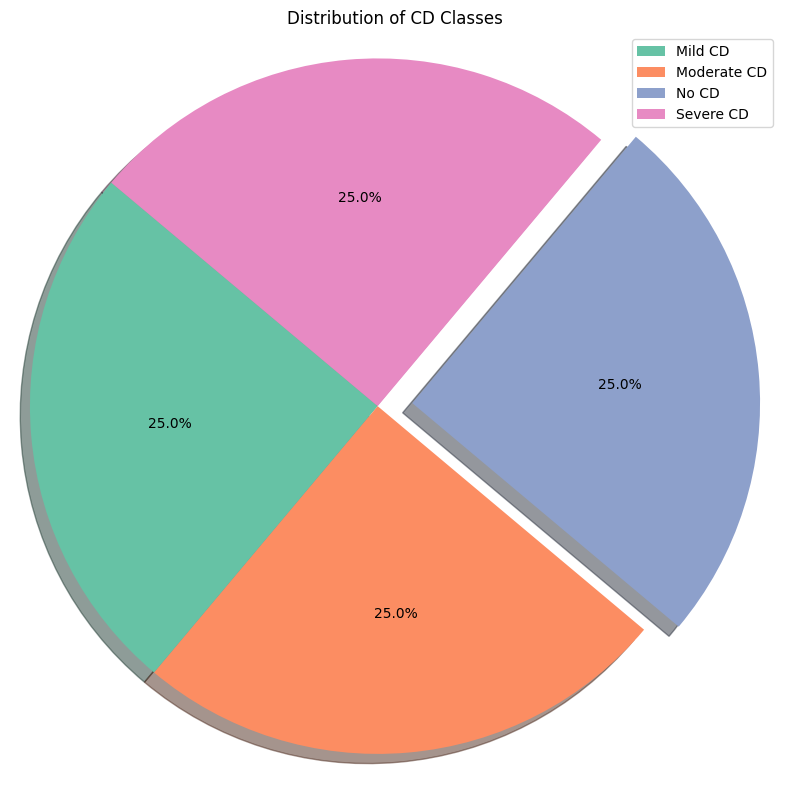

In [9]:
import matplotlib.pyplot as plt

# Data
classes = ['Mild CD', 'Moderate CD', 'No CD', 'Severe CD']
counts = [45645, 45645, 45645, 45645]
colors = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3']  # Pastel colors
explode = (0, 0, 0.1, 0)  # Explode the 'No CD' slice for emphasis

# Create pie chart
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=None, autopct='%1.1f%%', startangle=140, colors=colors, explode=explode, shadow=True)

# Adding legend
plt.legend(labels=classes, loc="best")

# Adding title
plt.title('Distribution of CD Classes')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Show plot
plt.tight_layout()
plt.show()


In [12]:
df_full = pd.read_csv('/content/df_final_check.csv')

ParserError: Error tokenizing data. C error: Expected 84 fields in line 9375, saw 90


In [ ]:
os.listdir('/content/drive/MyDrive/Colab Notebooks/Data Mining/Data/')

In [ ]:
df_full.head()

In [ ]:
df_full.isnull().sum()

In [ ]:
# Iterate over each column in the DataFrame
for column in df_full.columns:
    # Get unique values of the current column
    unique_values = df_full[column].unique()

    # Print the column name and its unique values
    print("Column:", column)
    print("Unique values:", unique_values)
    print()  # Add an empty line for better readability


In [ ]:
# Convert the unique values of the '_DRNKWK2' column to integers
unique_values_int = df_full['_DRNKWK2'].astype(int).unique()

# Print the unique integer values of the '_DRNKWK2' column
print("Unique integer values of '_DRNKWK2' column:", unique_values_int)


In [ ]:
import numpy as np

# Function to compute Gini entropy
def gini_entropy(data):
    # Count the occurrences of each unique value
    unique, counts = np.unique(data, return_counts=True)
    # Compute the probabilities of each unique value
    probabilities = counts / len(data)
    # Compute Gini entropy
    gini = 1 - np.sum(probabilities ** 2)
    return gini

# Dictionary to store Gini entropy values
gini_dict = {}

# Iterate over each column in the DataFrame
for column in df_full.columns:
    # Compute Gini entropy for the current column
    gini = gini_entropy(df_full[column])

    # Store Gini entropy in the dictionary
    gini_dict[column] = gini

# Sort the dictionary by Gini entropy values
sorted_gini = sorted(gini_dict.items(), key=lambda x: x[1])

# Print the sorted Gini entropy values
for column, gini in sorted_gini:
    print("Column:", column)
    print("Gini entropy:", gini)
    print()  # Add an empty line for better readability


In [ ]:
import numpy as np

# Function to compute entropy
def entropy(data):
    # Count the occurrences of each unique value
    _, counts = np.unique(data, return_counts=True)
    # Compute the probabilities of each unique value
    probabilities = counts / len(data)
    # Compute entropy
    entropy = -np.sum(probabilities * np.log2(probabilities))
    return entropy

# Dictionary to store entropy values
entropy_dict = {}

# Iterate over each column in the DataFrame
for column in df_full.columns:
    # Compute entropy for the current column
    ent = entropy(df_full[column])

    # Store entropy in the dictionary
    entropy_dict[column] = ent

# Sort the dictionary by entropy values
sorted_entropy = sorted(entropy_dict.items(), key=lambda x: x[1])

# Print the sorted entropy values
for column, ent in sorted_entropy:
    print("Column:", column)
    print("Entropy:", ent)
    print()  # Add an empty line for better readability


In [ ]:
 # Get the top 5 columns with the highest number of null values
top_null_values = df_full.isnull().sum().nlargest(5)

# Display the top 5 columns with the highest number of null values
print(top_null_values)


In [ ]:
X = df_full.drop(columns=["Class"])
y = df_full["Class"]

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply Linear Discriminant Analysis (LDA)
lda = LinearDiscriminantAnalysis()
X_train_lda = lda.fit_transform(X_train_scaled, y_train)
X_test_lda = lda.transform(X_test_scaled)

# Now you can use X_train_lda and X_test_lda as your transformed features


In [ ]:
X_train_lda

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Apply Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train_lda, y_train)

# Predict on the test set
y_pred = logreg.predict(X_test_lda)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Apply Random Forest
random_forest = RandomForestClassifier()
random_forest.fit(X_train_lda, y_train)

# Predict on the test set
y_pred = random_forest.predict(X_test_lda)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


In [ ]:
df_full.groupby(['Class']).size()

In [ ]:
from imblearn.over_sampling import SMOTE
import pandas as pd

# Assuming df_full contains your data and 'Class' is the target variable

# Instantiate SMOTE
smote = SMOTE(random_state=42)

# Resample the data to balance the classes
X_resampled, y_resampled = smote.fit_resample(df_full.drop(columns=["Class"]), df_full["Class"])

# Convert the resampled data back to a DataFrame
df_resampled = pd.DataFrame(X_resampled, columns=df_full.drop(columns=["Class"]).columns)
df_resampled["Class"] = y_resampled

# Check the class distribution after resampling
print(df_resampled.groupby(['Class']).size())


In [ ]:
X = df_full.drop(columns=["Class"])
y = df_full["Class"]

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Apply Random Forest
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

# Predict on the test set
y_pred = random_forest.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)



In [ ]:
pip install catboost

In [ ]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Assuming you have already split your data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply CatBoostClassifier
catboost = CatBoostClassifier()
catboost.fit(X_train, y_train)

# Predict on the test set
y_pred = catboost.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
